In [240]:
import pandas as pd
import subprocess
import math
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [241]:
DATA_DIR = "/home/nasm716/row_hammer/row_hammer_data/"
temp_list=["low","m15","15","25","50","m75"]
pre_data_dict=dict()
for temp in temp_list:
    data=DATA_DIR+temp+"/retention_time_data.txt"
    pre_data_dict[temp]=data
print(pre_data_dict)    
    # DATA_low=DATA_DIR+"low/retention_time_data.txt"
# DATA_m15=DATA_DIR+"low/retention_time_data.txt
# DATA_15=DATA_DIR+"low/retention_time_data.txt
# DATA_25=DATA_DIR+"25/retention_time_data.txt"
# DATA_50=DATA_DIR+"50/retention_time_data.txt"
# DATA3=DATA_DIR+"50/retention_time_merge.txt"

{'15': '/home/nasm716/row_hammer/row_hammer_data/15/retention_time_data.txt', 'low': '/home/nasm716/row_hammer/row_hammer_data/low/retention_time_data.txt', '50': '/home/nasm716/row_hammer/row_hammer_data/50/retention_time_data.txt', 'm15': '/home/nasm716/row_hammer/row_hammer_data/m15/retention_time_data.txt', '25': '/home/nasm716/row_hammer/row_hammer_data/25/retention_time_data.txt', 'm75': '/home/nasm716/row_hammer/row_hammer_data/m75/retention_time_data.txt'}


In [242]:
def data_new():
    data=pd.DataFrame()
    data[2]=[0]

    data[3]=[1]

    data[4]=[9]

    data[5]=[25]

    data[6]=[86]

    data[7]=[189]

    data[8]=[314]

    data[9]=[487]

    data[10]=[690]

    data[11]=[995]

    data[12]=[1333]

    data[13]=[1743]

    data[14]=[2265]

    data[15]=[2786]

    data[16]=[3399]

    data[32]=[37364]

    data[64]=[378379]

    data[128]=[3003234]

    data[256]=[16714118]

    data[512]=[64623695]

    data[1024]=[175560579]
    return data

In [243]:
def count_bits(failure_bit,temp):
    if(temp=="low"):
        temp=-25
    elif(temp=="m15"):
        temp=-15
    elif(temp=="m75"):
        temp=-75    
    else:
        temp=int(temp)
    count_data=pd.DataFrame(columns=["time",temp])
    time_list=list(failure_bit.keys())
    time_list.sort()
    for retention_time in time_list:
         count_data=count_data.append({"time":retention_time,temp:len(failure_bit[retention_time])},ignore_index=True)
         count_data['time'] = pd.to_numeric(count_data['time'])
         count_data[temp] = pd.to_numeric(count_data[temp])
#count_data=count_data.T
    return count_data

In [244]:
def classify_failure_bits(failure_bit):
    classify_failure_bits=pd.DataFrame()
    time_list=list(failure_bit.keys())
    time_list.sort()
    idx=0
    past_key=0
    num_classify_data=0
    failed_cell=list()
    
    for retention_time in time_list:
#        print(retention_time ,":")
        idx=0
        unique=0
        non_repeat=0
        repeat=0
        num_failed_cell=len(failed_cell)
        for current_fail_addr in failure_bit[retention_time]:
            while(idx<len(failed_cell) and failed_cell[idx]<current_fail_addr):
                    idx=idx+1
            if(idx<len(failed_cell) and failed_cell[idx]==current_fail_addr):
                repeat=repeat+1
            else:
                unique=unique+1
                failed_cell.append(current_fail_addr)
        failed_cell.sort()
        non_repeat=len(failed_cell)-repeat-unique
        classify_failure_bits[retention_time]=[repeat,non_repeat,unique]
    
#         display(failed_cell)
#         print("repeat :", repeat)
#         print("non_repeat:", non_repeat) #non_repeat=total_cell-repeat-unique
#         print("unique:" ,unique)
    classify_failure_bits=classify_failure_bits.T
    classify_failure_bits=classify_failure_bits.rename(columns={0:'repeat',1:"non_repeat",2:"unique"});
    return classify_failure_bits 

In [245]:
def graph_bar(data):
    data.plot.bar(title="Retention time")
    plt.xlabel("retention time[s]")
    plt.ylabel("# of error bits")

In [246]:
def graph_line(data):
    data.plot.line(title="Retention time",logx=True,logy=True)
    plt.xlabel("retention time[s]")
    plt.ylabel("# of error bits")

In [247]:
def graph_scatter(data):
    color=["Red","Blue","Green","Black","Yellow","Purple"]
    for index,data in enumerate(result_list):
        col_list=data.columns
        print(data)
        if(index==0):
            ax1=data.plot(kind='scatter',title="Retention time",x=col_list[0],y=col_list[1],c=color[index],label=col_list[1],logx=True,logy=True)
#             ax1=data.plot(kind='scatter',title="Retention time",x="index",y=columns,c=color[index],label=columns,logx=True)
        else:
            data.plot(kind='scatter',title="Retention time",x=col_list[0],y=col_list[1],c=color[index],label=col_list[1],logx=True,logy=True,ax=ax1)
#             ax1=data.plot(kind='scatter',title="Retention time",x="index",y=columns,c=color[index],label=columns,logx=True,ax=ax1)
    ax1.set_xlim(1,20000)
    ax1.set_ylim(1,40000)
#    ax1.set_ylim(1,200000000)
    print(ax1)
    plt.xlabel("retention time[s]")
    plt.ylabel("# of error bits")

    time      15
0    4.0     0.0
1    6.0     0.0
2    8.0     0.0
3   10.0     2.0
4   12.0     7.0
5   14.0    19.0
6   16.0    40.0
7   18.0    63.0
8   20.0    81.0
9   22.0   141.0
10  24.0   239.0
11  26.0   372.0
12  28.0   427.0
13  30.0   448.0
14  32.0   575.0
15  34.0   826.0
16  36.0  1172.0
17  38.0  1071.0
18  40.0  1166.0
19  42.0  1592.0
20  44.0  2246.0
21  46.0  2145.0
22  48.0  2184.0
23  50.0  2857.0
24  52.0  3879.0
25  54.0  3216.0
26  56.0  3671.0
27  58.0  5162.0
28  60.0  5216.0
29  62.0  5524.0
      time      -25
0      2.0      0.0
1      3.0      0.0
2      4.0      0.0
3      5.0      0.0
4      6.0      0.0
5      7.0      0.0
6      8.0      0.0
7      9.0      0.0
8     10.0      0.0
9     11.0      0.0
10    12.0      1.0
11    13.0      1.0
12    14.0      1.0
13    15.0      1.0
14    16.0      1.0
15    32.0      1.0
16    64.0      4.0
17   128.0     51.0
18   256.0    462.0
19   512.0   3494.0
20  1024.0  26489.0
   time       50
0   0.4      0.0

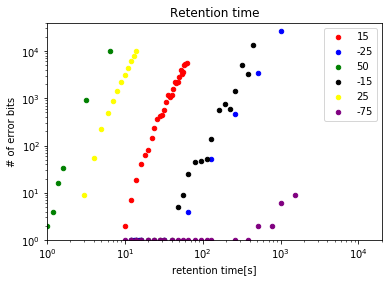

In [248]:
# data1=count_bits(failure_bit(DATA1))
# data2=count_bits(failure_bit(DATA2))
# data3=count_bits(failure_bit(DATA3))
result_list=[]
partial_result=pd.DataFrame()
result=pd.DataFrame()
for i,(key, val) in enumerate(pre_data_dict.items()):
    partial_result=(count_bits(failure_bit(val),key))
    result_list.append(partial_result)
    #     if(i==0):
#         result=(partial_result)
#     else:
#         result=pd.concat([result,partial_result],axis=1)

result
result=result.replace(0.0,np.nan)
graph_scatter(result)
# display(data)
# # display(data)
# # graph_line(data)
# # graph_scatter(data4.T)
# graph_scatter(data)
# # data2.columns=["300K"]
# # graph(data2)
# # display(data)
# # data1.columns=["260K"]
# # graph(data1)

In [249]:
def failure_bit(data):
    f = open(data, 'r')
    failure_bit=dict()
    addr_list=list()
    retention_time=0

    for line in f:
        line=line.rstrip('\n')
        line=line.split(" ")
        if len(line)==1: #end of file    
            if(line[0]=="end"):
                failure_bit[retention_time]=addr_list
                break
            else:
                continue
        elif line[1]==":":
            if retention_time==0:
                retention_time=float(float(line[0])/1000)
            else:
                failure_bit[retention_time]=addr_list
                retention_time=float(float(line[0])/1000)
                addr_list=[]
        else:
#             print(line[0])
            if(int(line[0],16)!=0x1fff7):
                bit_addr=int(line[0],16)*64+int(line[1],16)
                addr_list.append(bit_addr)
#     count_bits(failure_bit)
#     classify_data=classify_failure_bits(failure_bit)
#     classify_data.plot
    # display(failure_bit)
    f.close()
    return failure_bit
